In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Data

In [2]:
jsonq = pd.read_json('old-results/Python/json-queries-performance.json')

In [3]:
pandasq = pd.read_json('old-results/Python/pandas-queries-performance.json') 

In [4]:
postq = pd.read_json('old-results/Python/post-queries-performance.json')

#### Box Plots

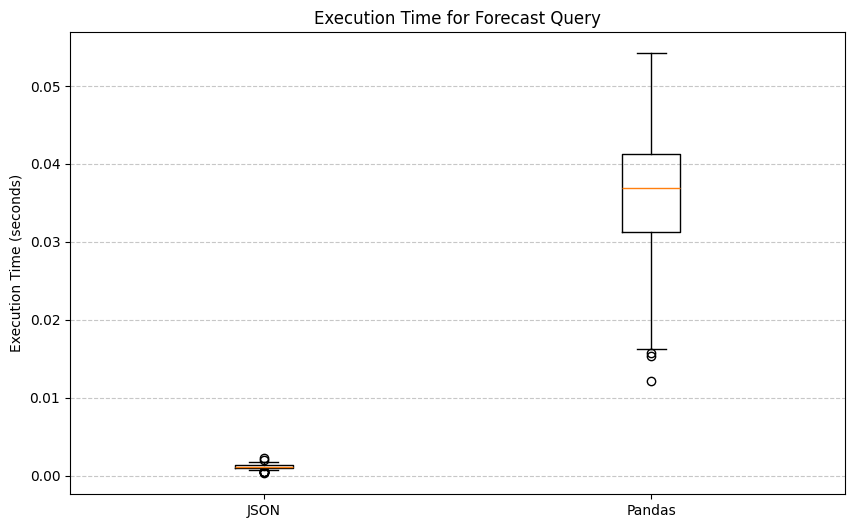

In [5]:
data1 = jsonq[jsonq['step'] == "Forecast Query"]['execution_time_seconds']
data2 = pandasq[pandasq['step'] == "Forecast Query"]['execution_time_seconds']

forecast = [data1, data2]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(forecast, tick_labels=['JSON', 'Pandas'])
plt.title('Execution Time for Forecast Query')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

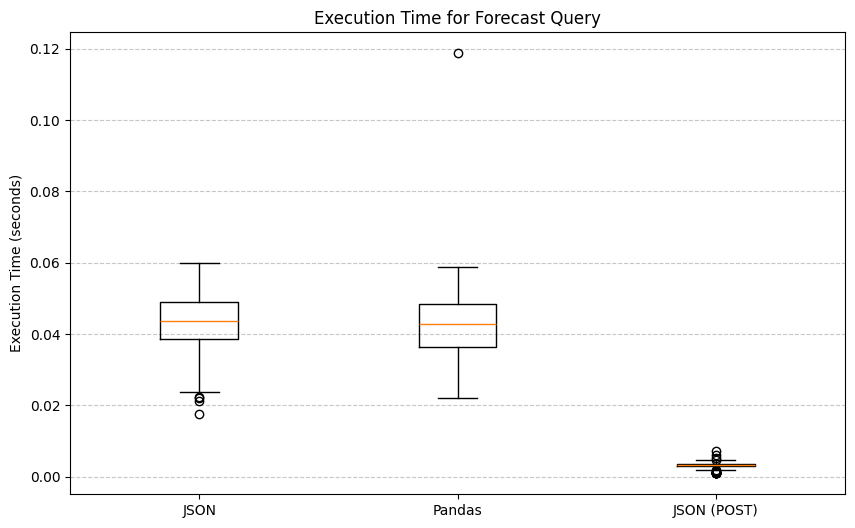

In [6]:
data1 = jsonq[jsonq['step'] == "HubSpot Query"]['execution_time_seconds']
data2 = pandasq[pandasq['step'] == "HubSpot Query"]['execution_time_seconds']
data3 = postq[postq['step'] == "HubSpot Query"]['execution_time_seconds']


forecast = [data1, data2,data3]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(forecast, tick_labels=['JSON', 'Pandas', 'JSON (POST)'])
plt.title('Execution Time for Forecast Query')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

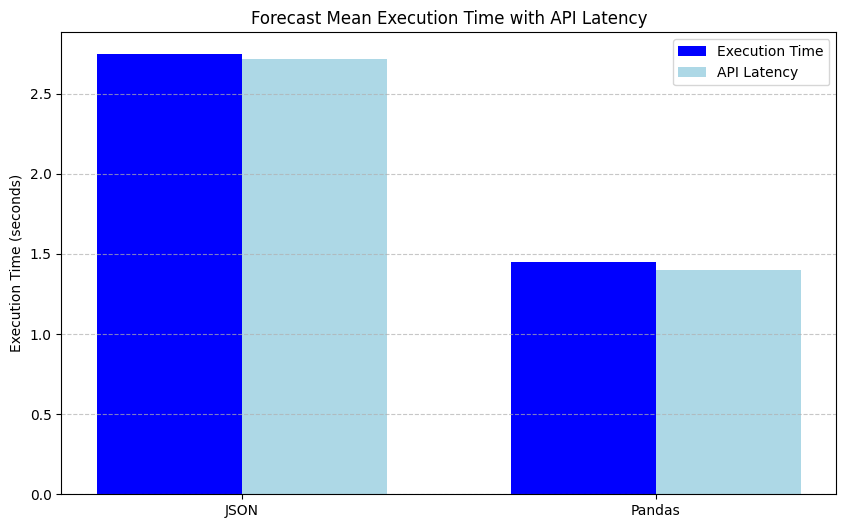

In [7]:
json_filtered_api = jsonq[jsonq['step'] == "Forecast API"]
pandas_filtered_api = pandasq[pandasq['step'] == "Forecast API"]

json_filtered_query = jsonq[jsonq['step'] == "Forecast Entire Query Process"]
pandas_filtered_query = pandasq[pandasq['step'] == "Forecast Entire Query Process"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()

pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()

sources = ['JSON', 'Pandas']
execution_means = [json_mean_execution, pandas_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency]

x = np.arange(len(sources)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

execution_bars = ax.bar(x - width/2, execution_means, width, label='Execution Time', color='blue')
latency_bars = ax.bar(x + width/2, latency_means, width, label='API Latency', color='lightblue')

ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Forecast Mean Execution Time with API Latency')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

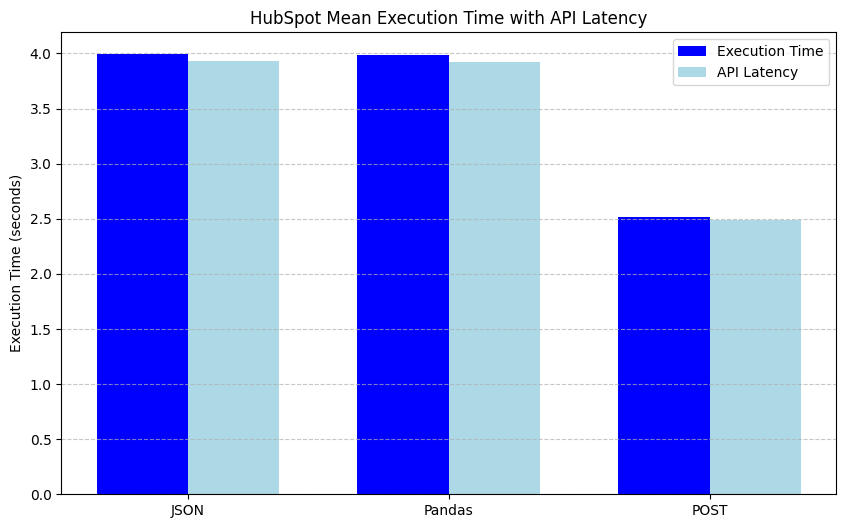

In [8]:
json_filtered_api = jsonq[jsonq['step'] == "HubSpot API"]
pandas_filtered_api = pandasq[pandasq['step'] == "HubSpot API"]
post_filtered_api = postq[postq['step'] == "HubSpot POST API"]

json_filtered_query = jsonq[jsonq['step'] == "HubSpot Entire Query Process"]
pandas_filtered_query = pandasq[pandasq['step'] == "HubSpot Entire Query Process"]
post_filtered_query = postq[postq['step'] == "HubSpot Entire Query Process"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()

pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()

post_mean_execution = post_filtered_query['execution_time_seconds'].mean()
post_mean_latency = post_filtered_api['latency_seconds'].mean()

sources = ['JSON', 'Pandas', 'POST']
execution_means = [json_mean_execution, pandas_mean_execution,post_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency,post_mean_latency]

x = np.arange(len(sources)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

execution_bars = ax.bar(x - width/2, execution_means, width, label='Execution Time', color='blue')
latency_bars = ax.bar(x + width/2, latency_means, width, label='API Latency', color='lightblue')

ax.set_ylabel('Execution Time (seconds)')
ax.set_title('HubSpot Mean Execution Time with API Latency')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

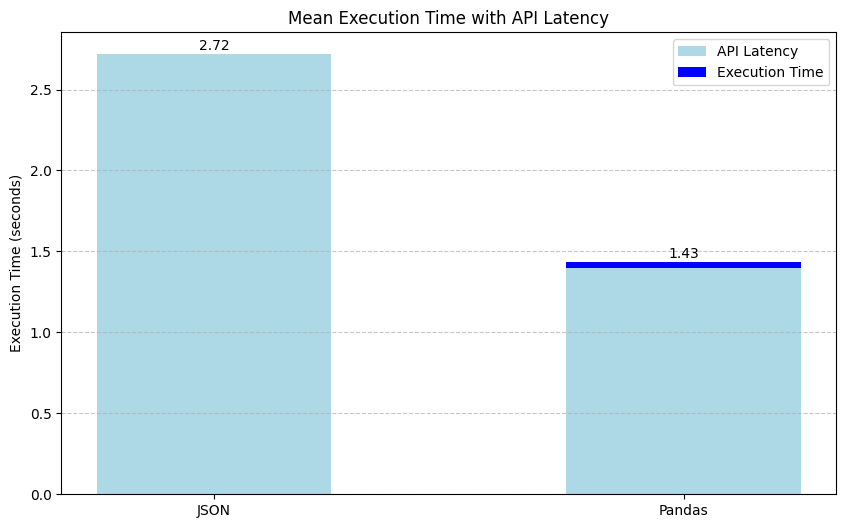

In [9]:
json_filtered_api = jsonq[jsonq['step'] == "Forecast API"]
pandas_filtered_api = pandasq[pandasq['step'] == "Forecast API"]

json_filtered_query = jsonq[jsonq['step'] == "Forecast Query"]
pandas_filtered_query = pandasq[pandasq['step'] == "Forecast Query"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()

pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()

sources = ['JSON', 'Pandas']
execution_means = [json_mean_execution, pandas_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency]

x = np.arange(len(sources)) 
width = 0.5 

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
latency_bars = ax.bar(x, latency_means, width, label='API Latency', color='lightblue')
execution_bars = ax.bar(x, execution_means, width, bottom=latency_means, label='Execution Time', color='blue')

# Add totals at the top of the stacked bars
totals = [latency + execution for latency, execution in zip(latency_means, execution_means)]
for i, total in enumerate(totals):
    ax.text(x[i], total + 0.01, f'{total:.2f}', ha='center', va='bottom', fontsize=10)

# Labeling the chart
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Mean Execution Time with API Latency')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()

# Grid and display
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

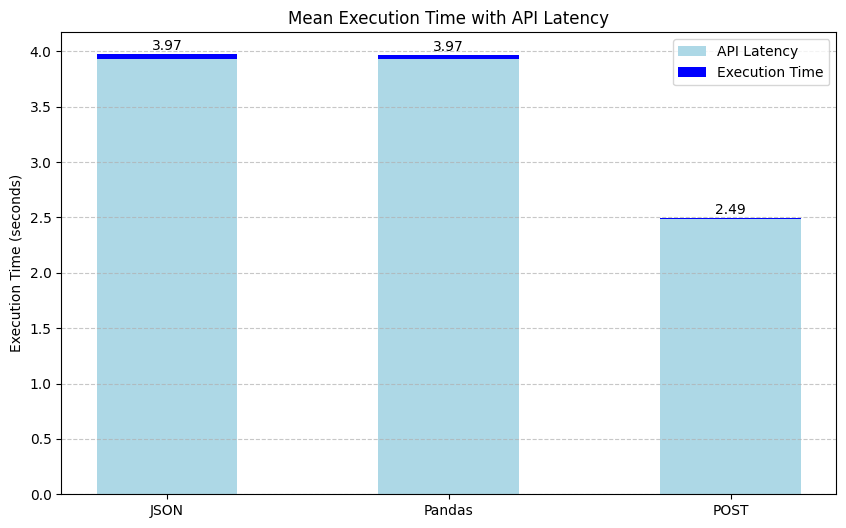

In [10]:
json_filtered_api = jsonq[jsonq['step'] == "HubSpot API"]
pandas_filtered_api = pandasq[pandasq['step'] == "HubSpot API"]
post_filtered_api = postq[postq['step'] == "HubSpot POST API"]

json_filtered_query = jsonq[jsonq['step'] == "HubSpot Query"]
pandas_filtered_query = pandasq[pandasq['step'] == "HubSpot Query"]
post_filtered_query = postq[postq['step'] == "HubSpot Query"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()

pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()

post_mean_execution = post_filtered_query['execution_time_seconds'].mean()
post_mean_latency = post_filtered_api['latency_seconds'].mean()

sources = ['JSON', 'Pandas', 'POST']
execution_means = [json_mean_execution, pandas_mean_execution,post_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency,post_mean_latency]

x = np.arange(len(sources)) 
width = 0.5 

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
latency_bars = ax.bar(x, latency_means, width, label='API Latency', color='lightblue')
execution_bars = ax.bar(x, execution_means, width, bottom=latency_means, label='Execution Time', color='blue')

# Add totals at the top of the stacked bars
totals = [latency + execution for latency, execution in zip(latency_means, execution_means)]
for i, total in enumerate(totals):
    ax.text(x[i], total + 0.01, f'{total:.2f}', ha='center', va='bottom', fontsize=10)

# Labeling the chart
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Mean Execution Time with API Latency')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()

# Grid and display
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
resource = pd.read_json('old-results/Python/resource_usage.json')
total_exec = resource[~resource['total_execution_time'].isna()]
resource.drop(columns = ['total_execution_time'],inplace = True)

In [13]:
resource.loc[resource['cpu_percent'] == 0.0, 'cpu_percent'] = np.nan

In [14]:
# resource['cpu_percent'] = resource['cpu_percent'].interpolate(method='linear')

In [15]:
resource.dropna(inplace = True)

In [16]:
resource[resource['script'] == 'json_queries.py'][['cpu_percent','memory_percent']].describe()

,cpu_percent,memory_percent
count,982.000000,982.000000
mean,18.553971,1.125457
std,8.408179,0.040185
min,2.000000,0.960825
25%,15.900000,1.097843
50%,18.000000,1.107883
75%,24.000000,1.170023
max,38.000000,1.190404


In [17]:
resource[resource['script'] == 'pandas_queries.py'][['cpu_percent','memory_percent']].describe()

,cpu_percent,memory_percent
count,956.000000,956.000000
mean,19.506276,1.125105
std,7.807636,0.036984
min,2.000000,1.025512
25%,16.000000,1.097843
50%,18.000000,1.107883
75%,24.000000,1.168725
max,48.000000,1.190753


In [18]:
resource[resource['script'] == 'post_queries.py'][['cpu_percent','memory_percent']].describe()

,cpu_percent,memory_percent
count,623.000000,623.000000
mean,19.085714,1.125971
std,8.915598,0.037185
min,2.000000,1.063026
25%,14.000000,1.097843
50%,19.800000,1.107883
75%,26.000000,1.170023
max,40.000000,1.190154


#### Analysis

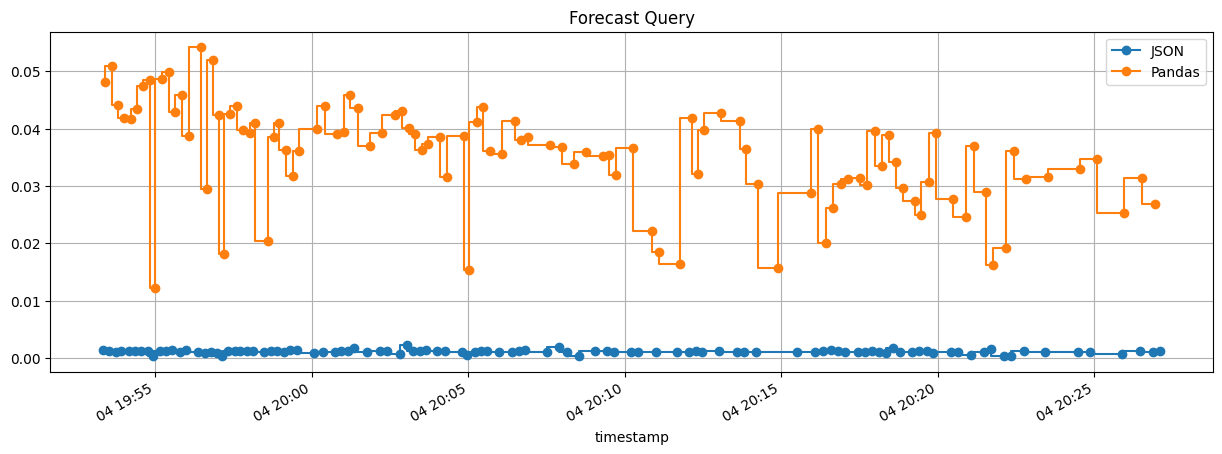

In [36]:
ax  = jsonq[jsonq['step'] == 'Forecast Query'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),marker = 'o',drawstyle = 'steps', label = 'JSON');
pandasq[pandasq['step'] == 'Forecast Query'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),ax = ax,marker = 'o',drawstyle = 'steps',label = 'Pandas');
plt.title('Forecast Query');

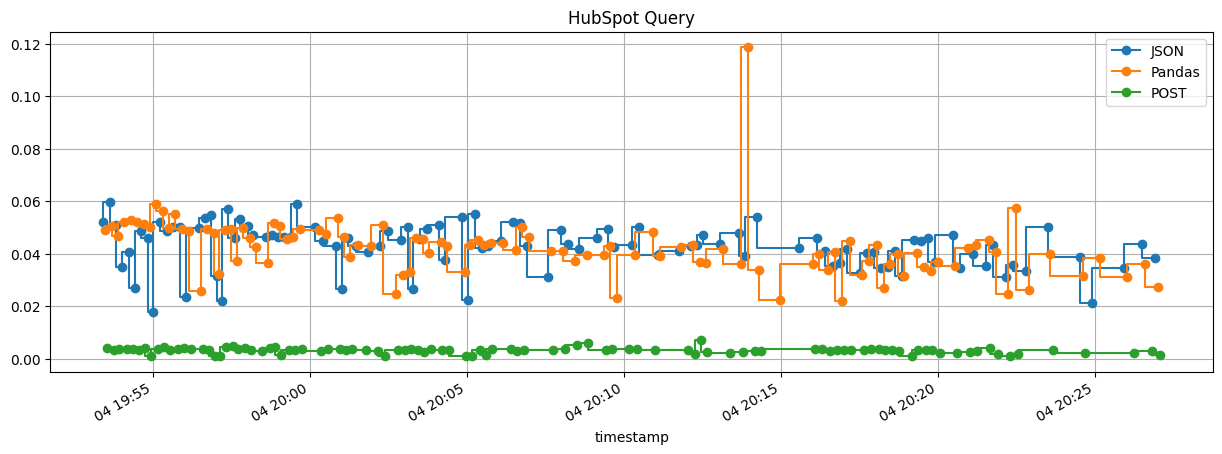

In [34]:
ax  = jsonq[jsonq['step'] == 'HubSpot Query'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),marker = 'o',drawstyle = 'steps', label = 'JSON');
pandasq[pandasq['step'] == 'HubSpot Query'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),ax = ax,marker = 'o',drawstyle = 'steps',label = 'Pandas');
postq[postq['step'] == 'HubSpot Query'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),ax = ax,marker = 'o',drawstyle = 'steps',label = 'POST');
plt.title('HubSpot Query');

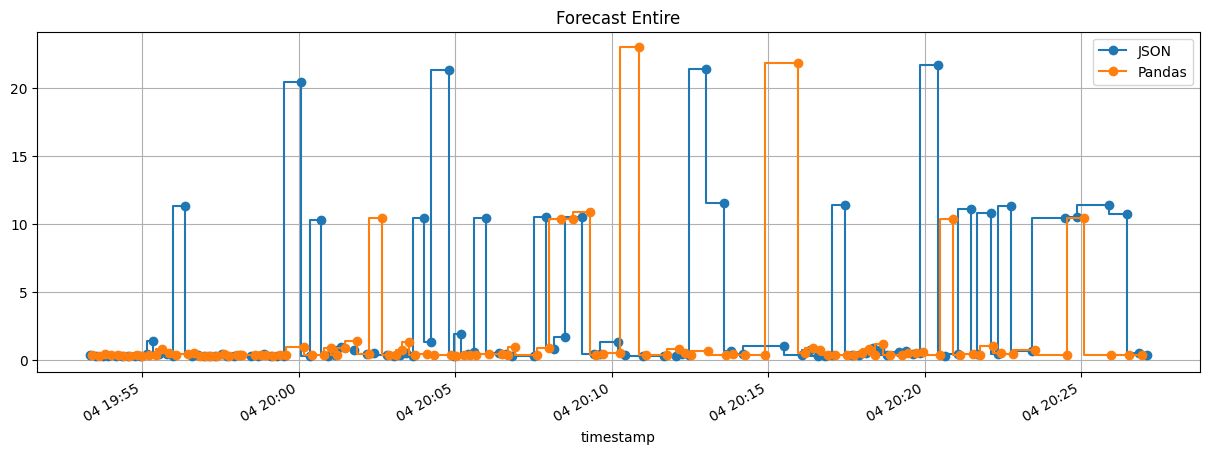

In [32]:
ax  = jsonq[jsonq['step'] == 'Forecast Entire Query Process'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),marker = 'o',drawstyle = 'steps', label = 'JSON');
pandasq[pandasq['step'] == 'Forecast Entire Query Process'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),ax = ax,marker = 'o',drawstyle = 'steps',label = 'Pandas');
plt.title('Forecast Entire');

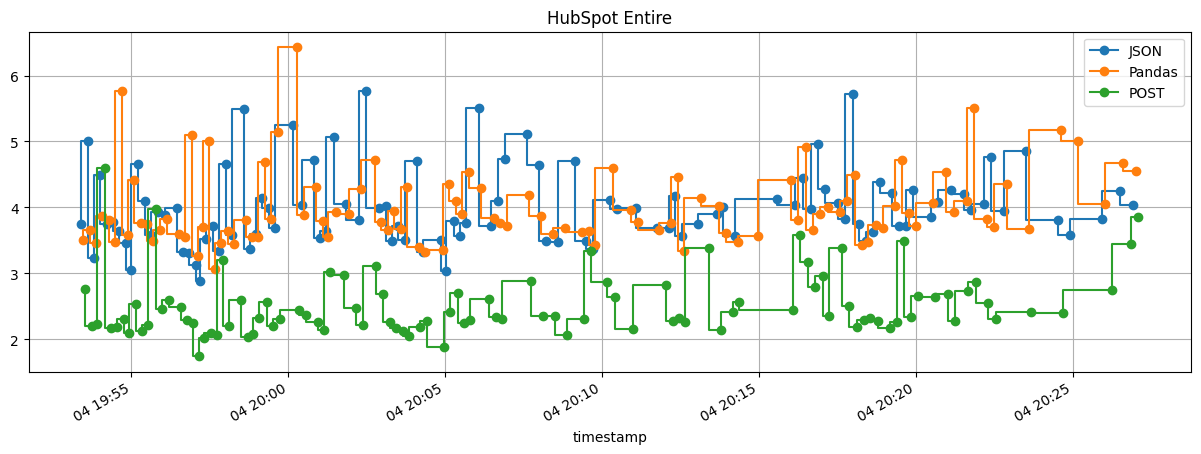

In [33]:
ax  = jsonq[jsonq['step'] == 'HubSpot Entire Query Process'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),marker = 'o',drawstyle = 'steps', label = 'JSON');
pandasq[pandasq['step'] == 'HubSpot Entire Query Process'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),ax = ax,marker = 'o',drawstyle = 'steps',label = 'Pandas');
postq[postq['step'] == 'HubSpot Entire Query Process'].plot(x = 'timestamp', y = 'execution_time_seconds',grid=True,figsize = (15,5),ax = ax,marker = 'o',drawstyle = 'steps',label = 'POST');
plt.title('HubSpot Entire');